<strong>Loading the data</strong>

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-04-17 11:40:13--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 74.125.201.128, 74.125.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.2’

horse-or-human.zip. 100%[===================>] 142.65M   184MB/s    in 0.8s    

2022-04-17 11:40:14 (184 MB/s) - ‘horse-or-human.zip.2’ saved [149574867/149574867]



In [2]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [3]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse46-8.png', 'horse47-6.png', 'horse29-5.png', 'horse25-8.png', 'horse36-5.png', 'horse14-1.png', 'horse06-2.png', 'horse30-3.png', 'horse47-0.png', 'horse36-6.png']
['human05-25.png', 'human02-28.png', 'human17-16.png', 'human08-18.png', 'human14-12.png', 'human17-17.png', 'human11-25.png', 'human05-05.png', 'human03-07.png', 'human06-14.png']


In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0


<strong>Visualising the data<strong>

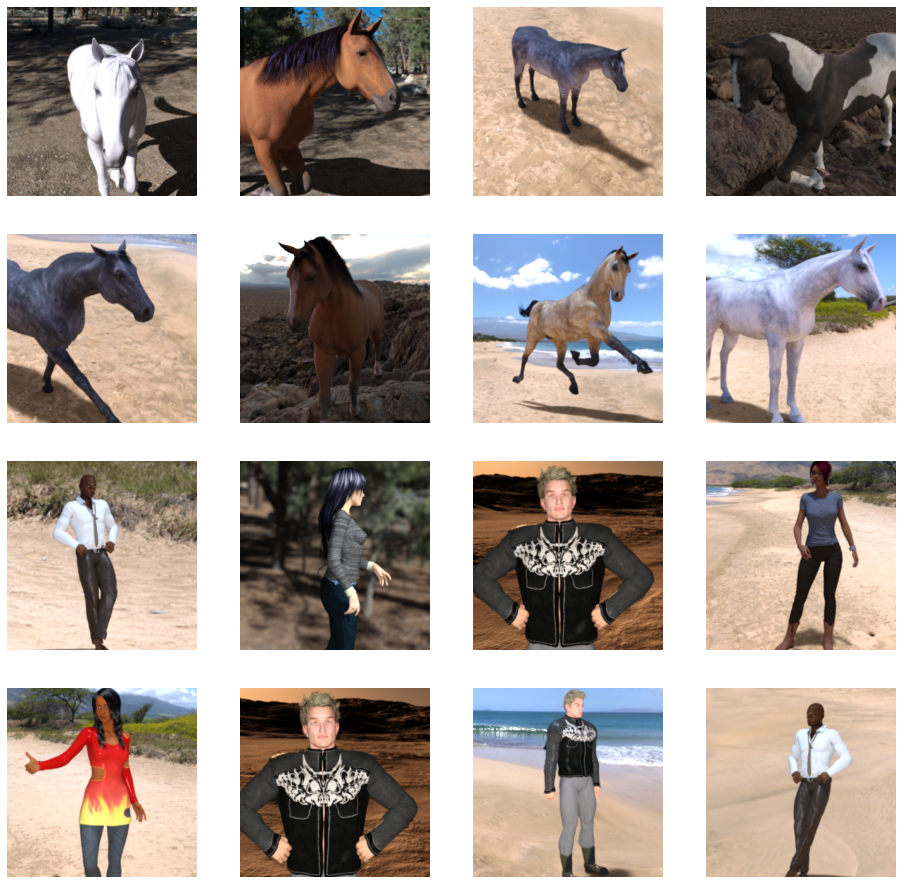

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
import tensorflow as tf

<strong>Creating a Neural Network<strong>

In [9]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

<strong>Loading the optimizer<strong>

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

<strong>Generating Image Data<strong>

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


<strong>Refitting the model<strong>

In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 14s 796ms/step - loss: 0.7296 - accuracy: 0.5217
Epoch 2/15
8/8 [==============================] - 7s 845ms/step - loss: 1.4642 - accuracy: 0.5217
Epoch 3/15
8/8 [==============================] - 7s 851ms/step - loss: 0.5442 - accuracy: 0.7341
Epoch 4/15
8/8 [==============================] - 8s 948ms/step - loss: 0.3114 - accuracy: 0.8711
Epoch 5/15
8/8 [==============================] - 7s 855ms/step - loss: 0.3819 - accuracy: 0.8665
Epoch 6/15
8/8 [==============================] - 8s 929ms/step - loss: 0.1254 - accuracy: 0.9522
Epoch 7/15
8/8 [==============================] - 7s 991ms/step - loss: 0.3543 - accuracy: 0.8610
Epoch 8/15
8/8 [==============================] - 7s 837ms/step - loss: 0.1856 - accuracy: 0.9299
Epoch 9/15
8/8 [==============================] - 7s 840ms/step - loss: 0.1034 - accuracy: 0.9622
Epoch 10/15
8/8 [==============================] - 7s 841ms/step - loss: 0.1152 - accuracy: 0.9544
Epoch 11/15
8/8 [=

<strong>Creating a function to load real world data into the model<strong>

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

def upload_image():
  uploaded = files.upload()
  for fn in uploaded.keys():
  
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    plt.imshow(img)
    print(classes[0])
      
    if classes[0]>0.5:
      print(fn + " is a human")
    else:
      print(fn + " is a horse")

<strong>Uploading the data to predict class<strong>

Saving suitcase-g3e99d4dd0_640.jpg to suitcase-g3e99d4dd0_640 (9).jpg
[0.9999882]
suitcase-g3e99d4dd0_640.jpg is a human


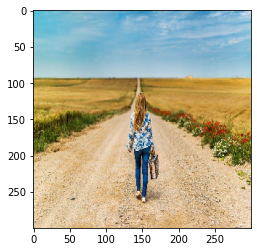

In [15]:
upload_image()

Saving man-g802282c85_640.jpg to man-g802282c85_640 (1).jpg
[1.]
man-g802282c85_640.jpg is a human


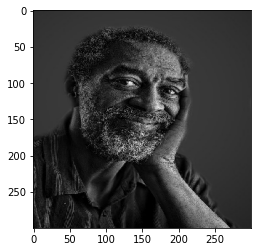

In [16]:
upload_image()

Saving man-g305decede_640.jpg to man-g305decede_640 (2).jpg
[0.99860066]
man-g305decede_640.jpg is a human


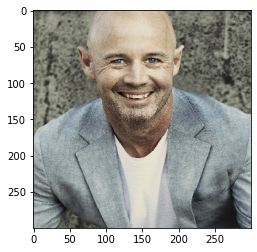

In [17]:
upload_image()

Saving woman-g8d2a0aad7_640.jpg to woman-g8d2a0aad7_640 (1).jpg
[1.]
woman-g8d2a0aad7_640.jpg is a human


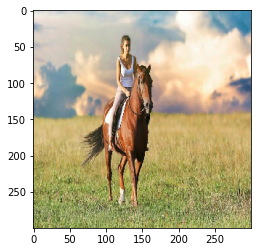

In [18]:
upload_image()

Saving cowgirl-gbe43b8ab4_640.jpg to cowgirl-gbe43b8ab4_640 (1).jpg
[0.99999666]
cowgirl-gbe43b8ab4_640.jpg is a human


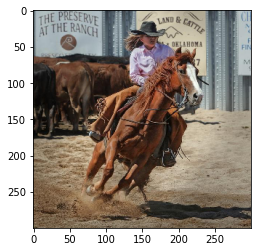

In [19]:
upload_image()

Saving horse-gc4f5501b8_640.jpg to horse-gc4f5501b8_640 (1).jpg
[0.04629093]
horse-gc4f5501b8_640.jpg is a horse


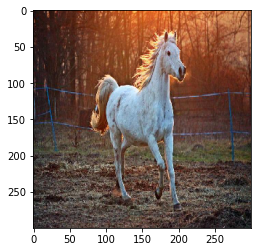

In [20]:
upload_image()

Saving mare-g4b245606f_640.jpg to mare-g4b245606f_640 (1).jpg
[1.9429132e-11]
mare-g4b245606f_640.jpg is a horse


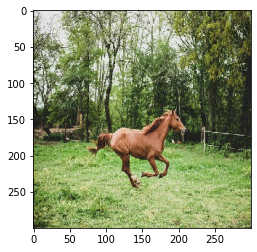

In [21]:

upload_image()

<strong>Visualizing the image through the various layers<strong>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


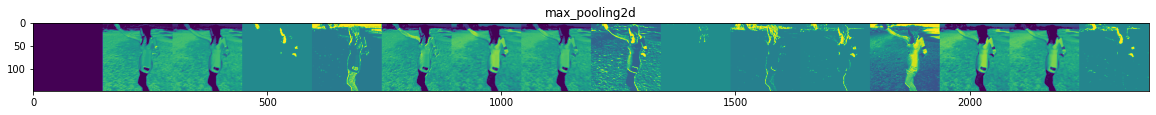

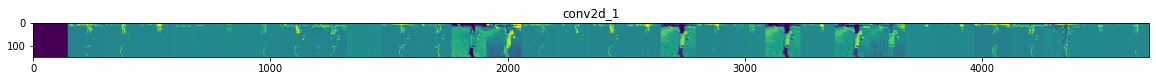

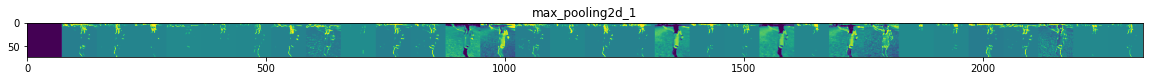

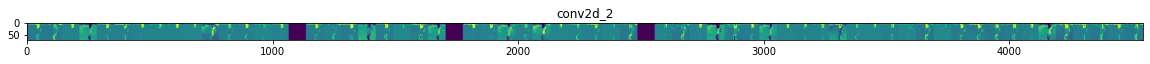

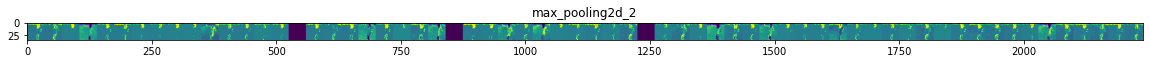

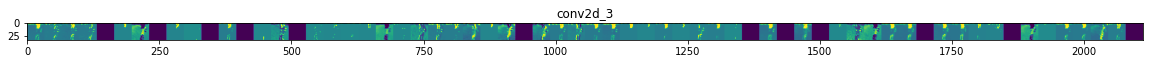

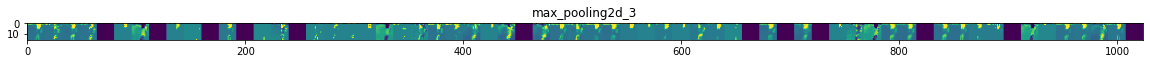

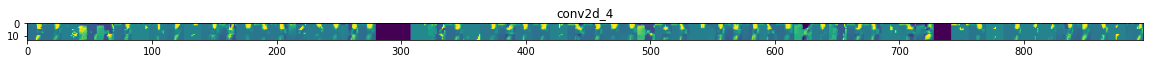

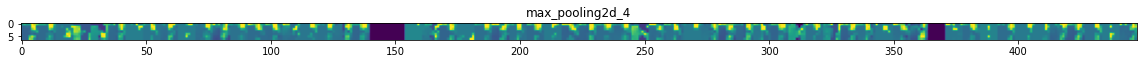

In [23]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')